# LEEM Plotting - Basic Tutorial

This file shows the basics for a lab book for LEEM data. First, you always have to import `agfalta.leem`.
It is also clever to define a variable for the folder in which the data is in. Usually, you can use `from agfalta import LEEMDIR`, which points to the LEEM directory on the surfer. Here, we use the folder where the test data is in. Also, we use the same image and the same stack all the time in the tutorial, so we define them as variables:

In [1]:
from agfalta import leem

LEEMDIR = "../testdata/"
img_file = LEEMDIR + "bremen.dat"
stack_directory = LEEMDIR + "test_stack_IV_g-Cu"

The functions shown here are meant for easy and fast analysis of LEEM data. Their scope lies mainly giving tools for fast preanalysis during measurement with only a few lines of code. Most of the functions take a path to a .dat file or a folder containing .dat files for plotting Images and Metadata. If you want a quick help text for a function, just do this:

In [2]:
help(leem.plot_img)

Help on function plot_img in module agfalta.leem.plotting:

plot_img(img, ax=None, title=None, fields=('temperature', 'pressure1', 'energy', 'fov'), figsize=(6, 6), ticks=False, log=False, **kwargs)
    Plots a single LEEM image with some metadata. If ax is given,
    the image is plotted onto that axes object. Takes either
    a file name or a LEEMImg object. Fields given are shown in the
    corners of the image.



## Plotting single images
Just give a file name to the `plot_img`-function:

<AxesSubplot:title={'center':'../testdata/bremen.dat'}>

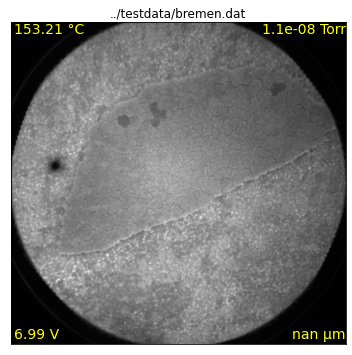

In [3]:
leem.plot_img(img_file)

By default, energy, temperature, pressure1 and FOV are printed in the corners of the image. **WARNING**: Sometimes, pressure1 is not the main chamber. Try pressure2 in that case. 

Different meta data can be selected by the fields argument. It takes a tuple or list (either brackets or parantheses), but it also takes just a single string if you need only one field. Also, you can print the logarithmic image with `log=True` (useful for LEED):

<AxesSubplot:title={'center':'../testdata/bremen.dat'}>

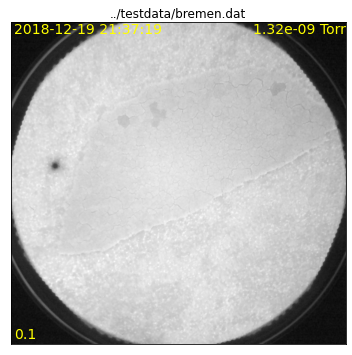

In [4]:
leem.plot_img(img_file, fields=("time", "pressure2", "exposure"), log=True)

For advanced use cases, you can also first load the image into a `LEEMImg` object and then plot it (see also LEEM_base.ipynb; this is only useful if you use the same image multiple times). Also, you can change the size of the image. All the different options for `plot_img` can be combined as you like.

<AxesSubplot:title={'center':'../testdata/bremen.dat'}>

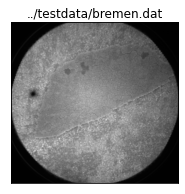

In [5]:
img = leem.LEEMImg(img_file)
leem.plot_img(img, figsize=(3, 3), fields=None)

There are also some functions for looking at the metadata. For example like this:

In [6]:
leem.print_meta(img)

,Name,energy,temperature,pressure1,pressure2,objective,fov,exposure,averaging,width,height
0,bremen.dat,6.99 V,153.21 °C,1.1e-08 Torr,1.32e-09 Torr,1725.1 mA,nan µm,0.1,1,624,600


## Plotting movies/stacks
Multiple images can be plotted by the function `plot_mov()`. It takes a path to a stack of leem images and plots them on a grid. You can use the same arguments as for the `plot_image()` function, for example `fields`. Additionally, the `skip` argument tells the function to only use every nth image. For example, every 10th:

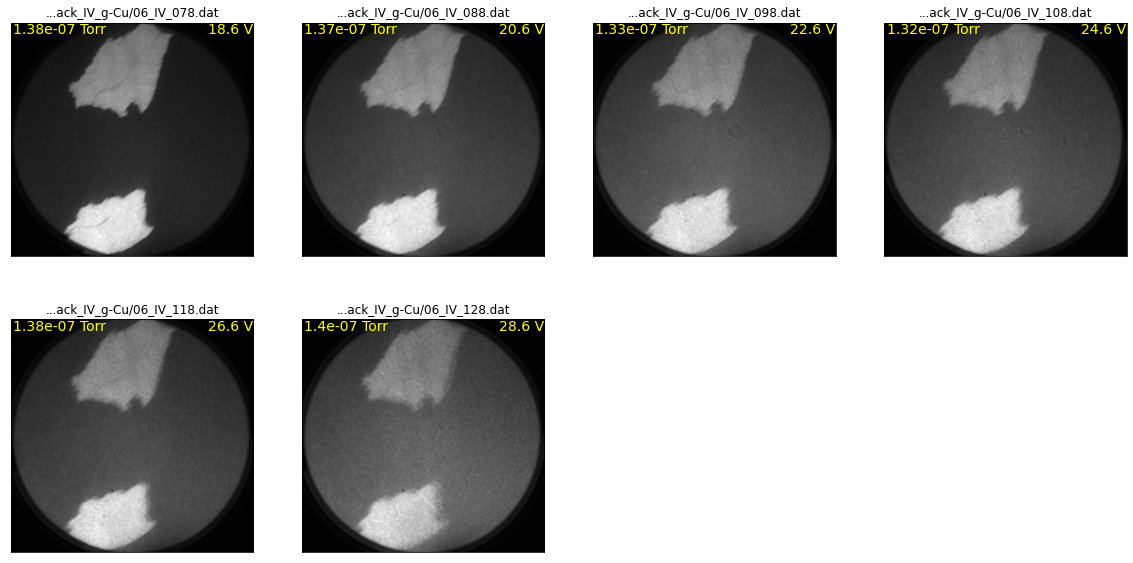

In [7]:
leem.plot_mov(stack_directory, skip=10, fields=("pressure1", "energy"))

Advanced: If you use the same stack multiple times, you can load it as a `LEEMStack` (see also LEEM_base.ipynb). Then, you can use it just like the directory name instead.

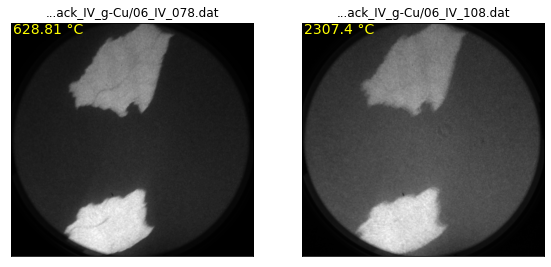

In [8]:
stack = leem.LEEMStack(stack_directory)
leem.plot_mov(stack, skip=30, fields="temperature")

## Looking at Metadata
`print_meta()` can be used for stacks just like for images:

In [9]:
leem.print_meta(stack_directory)

,Name,energy,temperature,pressure1,pressure2,objective,fov,exposure,averaging,width,height
0,06_IV_078.dat,18.6 V,628.81 °C,1.38e-07 Torr,1.36e-10 Torr,1685.5 mA,10 µm,0.25,4,624,600
1,06_IV_079.dat,18.8 V,628.59 °C,1.39e-07 Torr,1.34e-10 Torr,1685.6 mA,10 µm,0.25,4,624,600
2,06_IV_080.dat,19 V,626.99 °C,1.38e-07 Torr,1.37e-10 Torr,1685.6 mA,10 µm,0.25,4,624,600
3,06_IV_081.dat,19.2 V,627.45 °C,1.38e-07 Torr,1.33e-10 Torr,1685.7 mA,10 µm,0.25,4,624,600
4,06_IV_082.dat,19.4 V,628.59 °C,1.38e-07 Torr,1.36e-10 Torr,1685.7 mA,10 µm,0.25,4,624,600
5,06_IV_083.dat,19.6 V,1764.1 °C,1.38e-07 Torr,1.35e-10 Torr,1685.7 mA,10 µm,0.25,4,624,600
6,06_IV_084.dat,19.8 V,2307.4 °C,1.38e-07 Torr,1.34e-10 Torr,1685.8 mA,10 µm,0.25,4,624,600
7,06_IV_085.dat,20 V,2307.4 °C,1.38e-07 Torr,1.36e-10 Torr,1685.8 mA,10 µm,0.25,4,624,600
8,06_IV_086.dat,20.2 V,2307.4 °C,1.38e-07 Torr,1.37e-10 Torr,1685.9 mA,10 µm,0.25,4,624,600
9,06_IV_087.dat,20.4 V,2307.4 °C,1.37e-07 Torr,1.39e-10 Torr,1685.9 mA,10 µm,0.25,4,624,600


The `plot_meta()` function **plots** metadata of a stack. It takes a path to a stack and the metadata to plot as arguments. The metadata are written as a `fields` tuple, just like for `plot_img()` and `plot_mov()`.

Points have been excluded from plot because of unreasonably high temperature


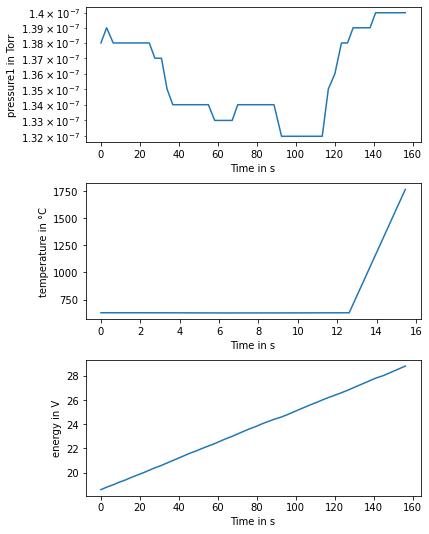

In [10]:
leem.plot_meta(stack_directory, fields=("pressure1", "temperature", "energy"))

## Extracting IV curves
Basic IV curve extraction is possible by the `plot_intensity()` function. The function receives a stack or the path to a directory and some arguments that specify where to take the intensity profile. This area where the profile is taken is also called a ROI. By default, a circular ROI is used. You then have to give `x0` and `y0` as the middle of that circle and you can set the `radius` (it defaults to 10 pixels):

(<AxesSubplot:xlabel='energy', ylabel='Intensity in a.u.'>,
 <agfalta.leem.processing.ROI at 0x7feacc519b20>)

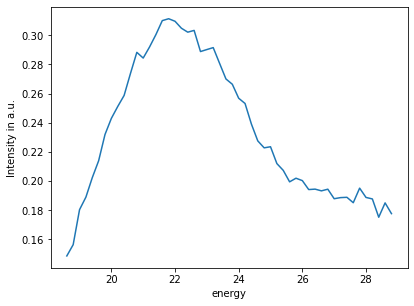

In [11]:
leem.plot_intensity(stack, x0=400, y0=400, radius=20)

If you want to see where you take the profile, use `plot_intensity_img()`:

(<AxesSubplot:xlabel='energy', ylabel='Intensity in a.u.'>,
 <AxesSubplot:title={'center':'...ack_IV_g-Cu/06_IV_078.dat'}>)

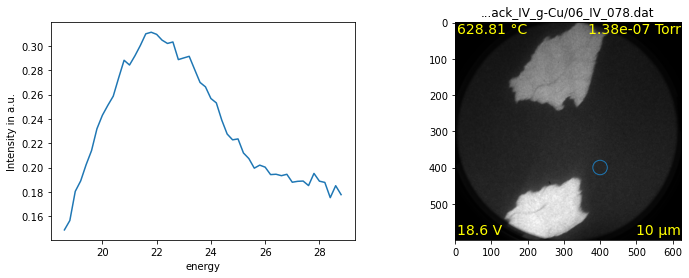

In [13]:
leem.plot_intensity_img(stack, x0=400, y0=400, radius=20)

You can not only take I(V) curves, but also other curves like intensity over time (in this case it is the same because this is an I(V) stack):

(<AxesSubplot:xlabel='rel_time', ylabel='Intensity in a.u.'>,
 <AxesSubplot:title={'center':'...ack_IV_g-Cu/06_IV_078.dat'}>)

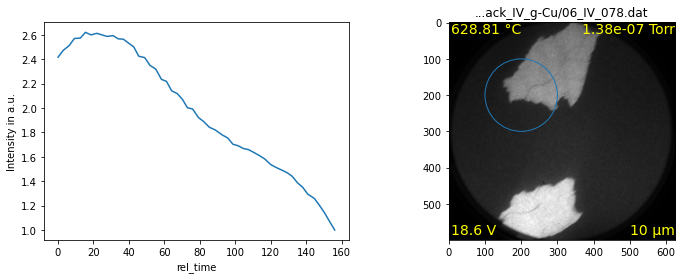

In [15]:
leem.plot_intensity_img(stack, x0=200, y0=200, radius=100, xaxis="rel_time")

Also, you can use rectangles or ellipses (use `help(leem.plot_intensity)` to get more info). Don't forget the underscore in `type_`.

(<AxesSubplot:xlabel='energy', ylabel='Intensity in a.u.'>,
 <AxesSubplot:title={'center':'...ack_IV_g-Cu/06_IV_078.dat'}>)

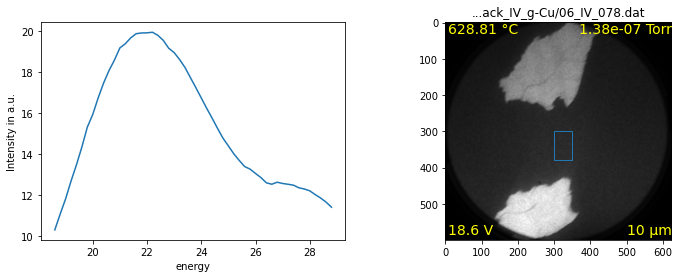

In [17]:
leem.plot_intensity_img(stack, x0=300, y0=300, type_="rectangle", width=50, height=80)